In [1]:
import tensorflow as tf
import tensorflow.contrib.keras.api.keras as K
import numpy as np 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
# Step 1: Load dataset
num_classes = 10
digits = load_digits(n_class=num_classes)
x = digits.data
y = digits.target

H = 8
W = 8
C = 1
# reshape x into a numpy array of images of size: height x width x number_of_channels
x = np.reshape(x, (x.shape[0], H, W, C))

print("data shape: ",x.shape)
print("class shape: ",y.shape)

# Split the data into training and testing sets
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# Convert labels to one-hot vector
y_train_onehot = np.zeros((len(y_train),num_classes))
for indx in range(len(y_train)):
    y_train_onehot[indx,y_train[indx]] = 1
y_test_onehot = np.zeros((len(y_test),num_classes))
for indx in range(len(y_test)):
    y_test_onehot[indx,y_test[indx]] = 1

print("train label shape: ", y_train_onehot.shape)
print("test label shape: ", y_test_onehot.shape)

data shape:  (1797, 8, 8, 1)
class shape:  (1797,)
train label shape:  (1437, 10)
test label shape:  (360, 10)


In [19]:
# Step 2: Build a CNN model to classify digits

# First, define the based sequential model
model = K.models.Sequential()

# Add the first convolutional layer:
# A 2D Convolution layer with: 
#     32 filters 
#     kernel size: 3x3
#     stride: 1
#     padding scheme: 'same'
#     use_bias: True
# as this is the first layer in the model, you need to include the 'input_shape' argument
model.add(K.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), use_bias = True, input_shape = (x.shape[1],x.shape[2],x.shape[3]), padding = 'same'))

# Add 'relu' activation layer
model.add(K.layers.Activation('relu'))

# Add the second convolutional layer:
# A 2D Convolution layer with: 
#     64 filters 
#     kernel size: 3x3
#     stride: 1
#     padding scheme: 'same'
#     use_bias: True
model.add(K.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), use_bias = True, padding = 'same'))
# Add 'relu' activation layer
model.add(K.layers.Activation('relu'))

# Add dropout layer with rate = 0.75 
model.add(K.layers.Dropout(rate = 0.75))

# Add 2D max pooling layer with pooling size = 2x2
model.add(K.layers.MaxPooling2D(pool_size=(2, 2)))

# Add Flatten layer to reshape the output of the previous layer into 1D vectors
model.add(K.layers.Flatten())
          
# Fully connected layers to perform the classification from the outputs of the previous layers

# Add the first fully connected layer
model.add(K.layers.Dense(10))
# Add 'relu' activation layer
model.add(K.layers.Activation('relu'))

# Add the second fully connected layer with 10 hidden units 
# (each hidden unit corresponds to one class, i.e. digit):
model.add(K.layers.Dense(10))

# Add 'softmax' activation layer to transform the score into class probabilities 
model.add(K.layers.Activation('softmax'))

# Compile the model with 'categorical_crossentropy' loss function and 
# 'sgd' optimizer
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Step 3: Train the model
model.fit(x_train, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
1437/1437 [==============================] - 1s 574us/step - loss: 2.3536 - acc: 0.1190
Epoch 2/10
1437/1437 [==============================] - 1s 413us/step - loss: 1.9782 - acc: 0.2686
Epoch 3/10
1437/1437 [==============================] - 1s 432us/step - loss: 1.5539 - acc: 0.4669
Epoch 4/10
1437/1437 [==============================] - 1s 431us/step - loss: 1.1058 - acc: 0.6326
Epoch 5/10
1437/1437 [==============================] - 1s 430us/step - loss: 0.7938 - acc: 0.7390
Epoch 6/10
1437/1437 [==============================] - 1s 424us/step - loss: 0.5704 - acc: 0.7968
Epoch 7/10
1437/1437 [==============================] - 1s 433us/step - loss: 0.4251 - acc: 0.8650
Epoch 8/10
1437/1437 [==============================] - 1s 424us/step - loss: 0.3807 - acc: 0.8810
Epoch 9/10
1437/1437 [==============================] - 1s 421us/step - loss: 0.2936 - acc: 0.8977
Epoch 10/10
1437/1437 [==============================] - 1s 421us/step - loss: 0.2655 - acc: 0.9074


In [21]:
# Step 4: Evaluate the model
scores = model.predict(x_test)
y_pred = np.argmax(scores, axis=1)
print("Accuracy={:.2f}".format(np.mean(y_pred == y_test)))

Accuracy=0.92


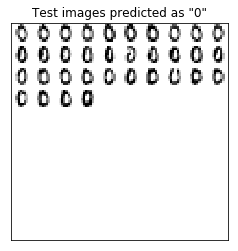

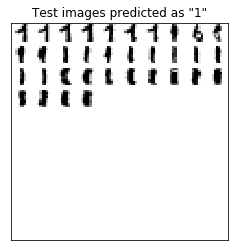

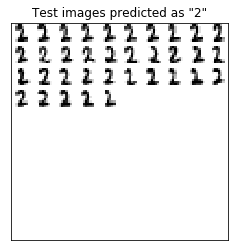

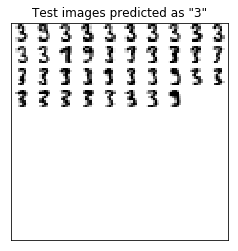

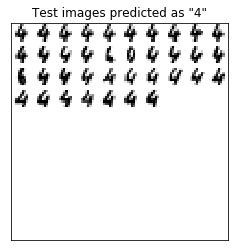

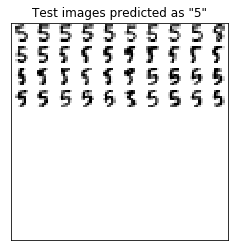

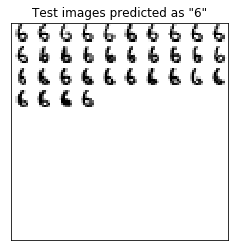

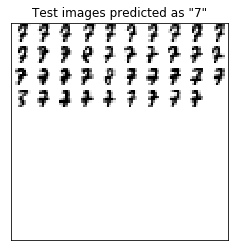

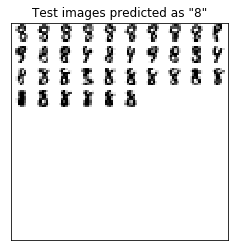

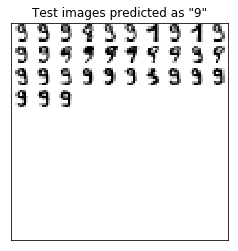

In [22]:
# Step 5: Visualize the classification results
for selected_class in range(0,10):
    x_visualize = x_test[y_pred == selected_class]
    # plot some images of the digits
    n_img_per_row = 10
    img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
    for i in range(n_img_per_row):
        ix = 10 * i + 1
        for j in range(n_img_per_row):
            iy = 10 * j + 1
            if i * n_img_per_row + j < len(x_visualize):
                img[ix:ix + 8, iy:iy + 8] = x_visualize[i * n_img_per_row + j].reshape((8, 8))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title('Test images predicted as "{:}"'.format(selected_class))
    plt.show()